In [31]:
#importing libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

In [32]:
Fitness = pd.read_csv("fitness_dataset.csv")

In [33]:
Fitness.head()

,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate
0,56,F,165.3,53.7,Dancing,41,Low,3.3,103
1,56,F,165.3,53.9,Swimming,28,Low,2.9,102
2,56,F,165.3,54.2,Swimming,21,Medium,2.6,126
3,56,F,165.3,54.4,Weight Training,99,Medium,10.7,141
4,56,F,165.3,54.7,Swimming,100,Medium,12.7,112


In [34]:
Fitness.shape

(687701, 9)

In [35]:
Fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687701 entries, 0 to 687700
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               687701 non-null  int64  
 1   gender            687701 non-null  object 
 2   height_cm         687701 non-null  float64
 3   weight_kg         687701 non-null  float64
 4   activity_type     687701 non-null  object 
 5   duration_minutes  687701 non-null  int64  
 6   intensity         687701 non-null  object 
 7   calories_burned   687701 non-null  float64
 8   avg_heart_rate    687701 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 47.2+ MB


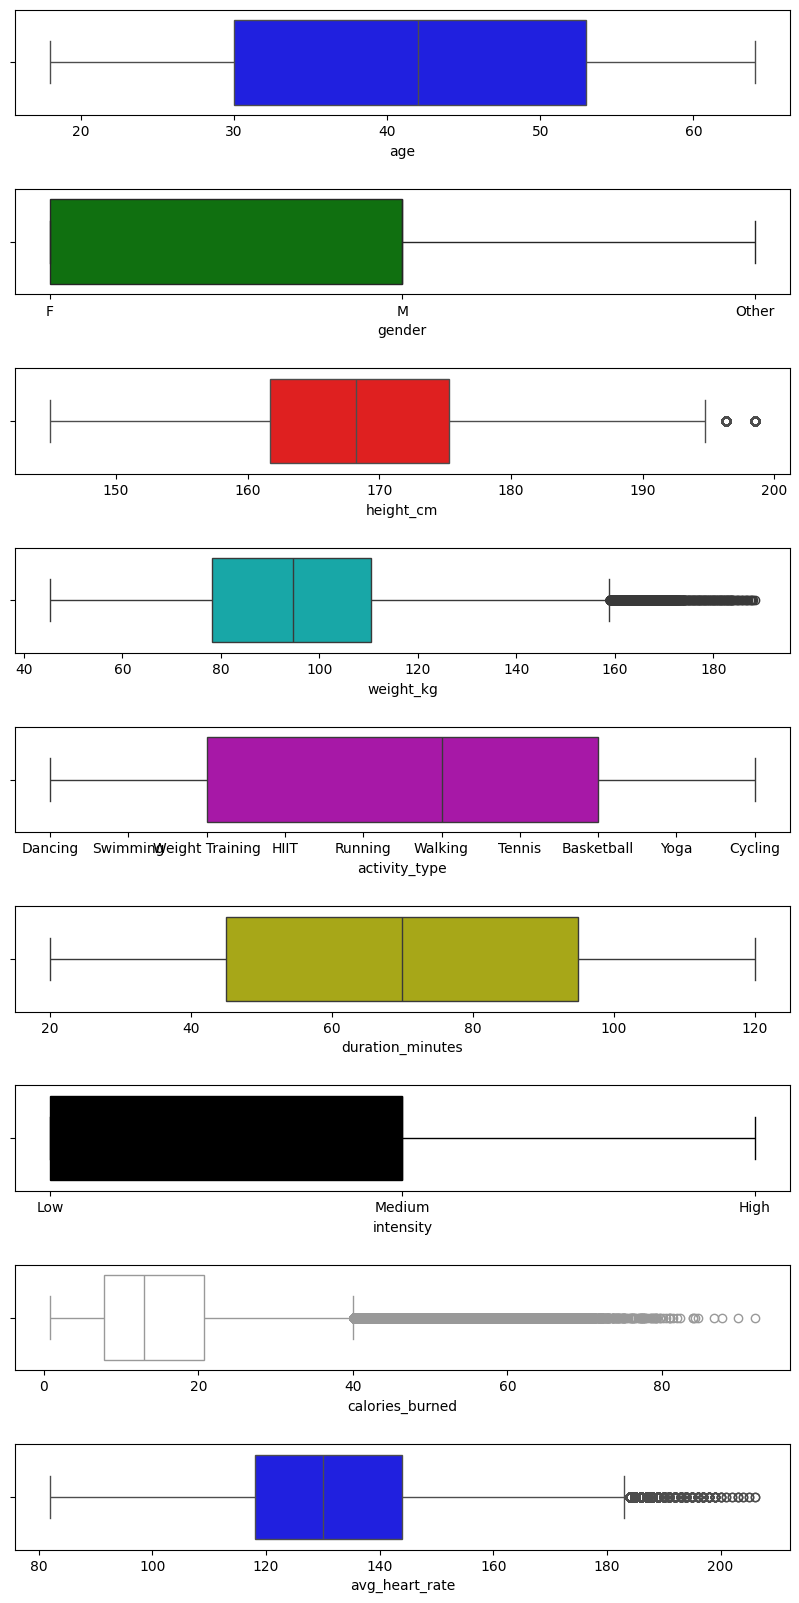

In [36]:
c = ['b','g', 'r', 'c', 'm','y','k','w','b' ]
fig1 , axes = plt.subplots(len(Fitness.columns),1,figsize=(10,20))
plt.subplots_adjust(wspace=0.3,hspace=0.7)
axes = axes.flatten()
for i, column in zip(range(len(Fitness.columns)),Fitness.columns):
  try:
    sns.boxplot(data = Fitness, x = column ,ax=axes[i],color=c[i])
  except:
    fig1.delaxes(axes[i])
    continue

<Axes: >

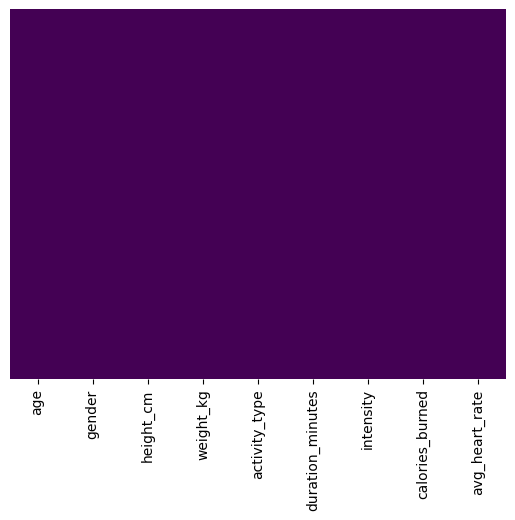

In [37]:
sns.heatmap(Fitness.isnull(), yticklabels=False,cbar=False,cmap="viridis")

In [38]:
print("Duplicates:", Fitness.duplicated().sum())

Duplicates: 0


Remove Outliers

In [39]:
Q1 = Fitness["calories_burned"].quantile(0.25)
Q3 = Fitness["calories_burned"].quantile(0.75)
IQR=Q3-Q1

#Define lower limits and upper limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter data within limits
Fitness = Fitness[(Fitness["calories_burned"] >= lower_bound)]

In [40]:
Fitness.head()

,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate
0,56,F,165.3,53.7,Dancing,41,Low,3.3,103
1,56,F,165.3,53.9,Swimming,28,Low,2.9,102
2,56,F,165.3,54.2,Swimming,21,Medium,2.6,126
3,56,F,165.3,54.4,Weight Training,99,Medium,10.7,141
4,56,F,165.3,54.7,Swimming,100,Medium,12.7,112


In [41]:
Fitness["BMI"] = Fitness["weight_kg"] / ((Fitness["height_cm"]/100)**2)
Fitness["BMI"] = round(Fitness["BMI"], 2)
Fitness.head()

,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate,BMI
0,56,F,165.3,53.7,Dancing,41,Low,3.3,103,19.65
1,56,F,165.3,53.9,Swimming,28,Low,2.9,102,19.73
2,56,F,165.3,54.2,Swimming,21,Medium,2.6,126,19.84
3,56,F,165.3,54.4,Weight Training,99,Medium,10.7,141,19.91
4,56,F,165.3,54.7,Swimming,100,Medium,12.7,112,20.02


In [42]:
bmi_category = ["Very severely underweight", "severely underweight", "Underweight", "Normal", "Overweight", "obese class I", "obese class II","obese class III"]
Fitness["Categorized_BMI"] = pd.cut(Fitness["BMI"],  bins = [0 , 15 , 16 , 18.5 , 25 , 30 , 35 , 40 , 50], right = False , labels = bmi_category)
Fitness["Categorized_BMI"] = Fitness["Categorized_BMI"].astype("object")
Fitness.head()

,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate,BMI,Categorized_BMI
0,56,F,165.3,53.7,Dancing,41,Low,3.3,103,19.65,Normal
1,56,F,165.3,53.9,Swimming,28,Low,2.9,102,19.73,Normal
2,56,F,165.3,54.2,Swimming,21,Medium,2.6,126,19.84,Normal
3,56,F,165.3,54.4,Weight Training,99,Medium,10.7,141,19.91,Normal
4,56,F,165.3,54.7,Swimming,100,Medium,12.7,112,20.02,Normal


In [43]:
Fitness.shape

(687701, 11)

In [44]:
# CONVERT categorical columns into number

encoder = LabelEncoder()
Fitness["activity_type"] = encoder.fit_transform(Fitness["activity_type"])
Fitness["intensity"] = encoder.fit_transform(Fitness["intensity"])
Fitness.head()

,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate,BMI,Categorized_BMI
0,56,F,165.3,53.7,2,41,1,3.3,103,19.65,Normal
1,56,F,165.3,53.9,5,28,1,2.9,102,19.73,Normal
2,56,F,165.3,54.2,5,21,2,2.6,126,19.84,Normal
3,56,F,165.3,54.4,8,99,2,10.7,141,19.91,Normal
4,56,F,165.3,54.7,5,100,2,12.7,112,20.02,Normal


In [45]:
print(Fitness.dtypes)

age                   int64
gender               object
height_cm           float64
weight_kg           float64
activity_type         int64
duration_minutes      int64
intensity             int64
calories_burned     float64
avg_heart_rate        int64
BMI                 float64
Categorized_BMI      object
dtype: object


In [46]:
Fitness = Fitness.dropna()

In [47]:
numeric_cols = ["age", "weight_kg", "height_cm", "BMI", "duration_minutes"]
for col in numeric_cols:
    print(f"{col} - {Fitness[col].dtype}")

age - int64
weight_kg - float64
height_cm - float64
BMI - float64
duration_minutes - int64


In [49]:
print(Fitness.dtypes)

age                   int64
gender               object
height_cm           float64
weight_kg           float64
activity_type         int64
duration_minutes      int64
intensity             int64
calories_burned     float64
avg_heart_rate        int64
BMI                 float64
Categorized_BMI      object
dtype: object


Data distribution

In [50]:
X = Fitness[['age', 'weight_kg', 'height_cm', 'BMI', 'activity_type', 'duration_minutes', 'intensity']]
Y = Fitness['calories_burned']

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

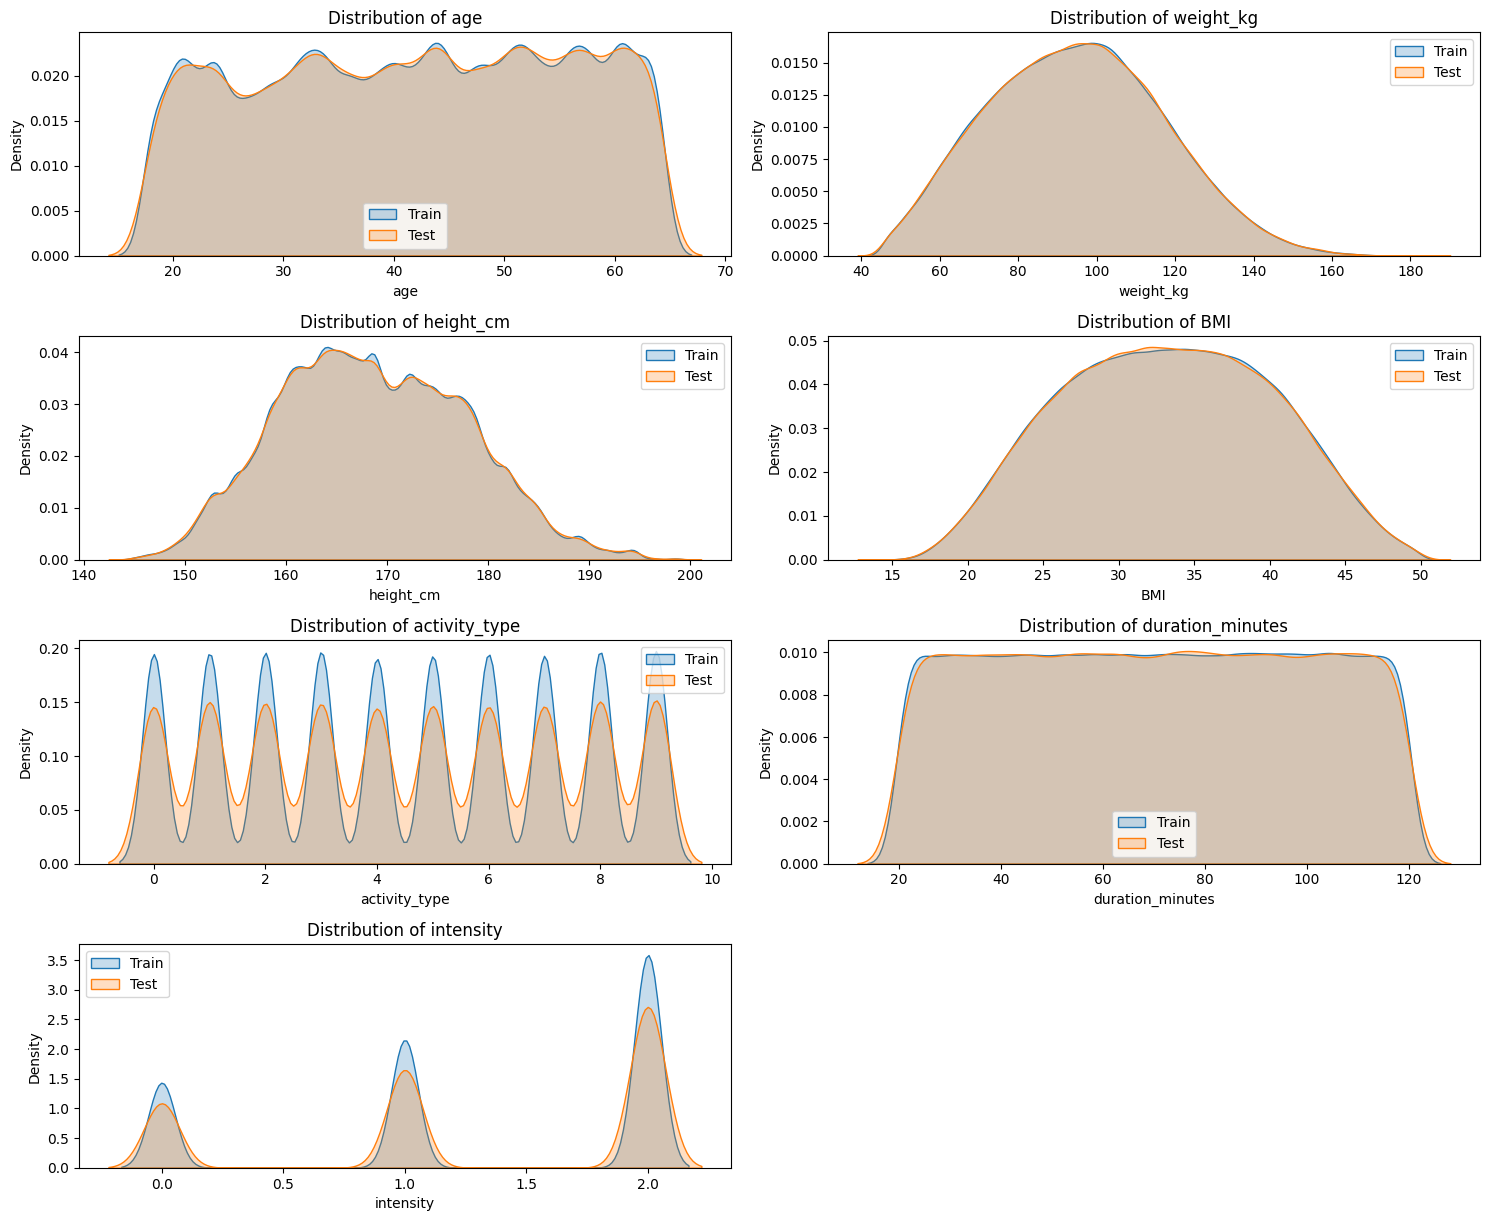

In [52]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Plot all numeric columns
plt.figure(figsize=(15, len(numeric_cols) * 3))  # Adjust figure size dynamically

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, i)  # Creating subplots
    sns.kdeplot(X_train[col], label="Train", shade=True)
    sns.kdeplot(X_test[col], label="Test", shade=True)
    plt.legend()
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

Train a Mchine learning model

In [53]:
#train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

#predict on test data
Y_pred = model.predict(X_test)

#evaluate model
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 0.05711339288969928


diet plan

In [54]:
def suggest_diet(calories_needed):
    if calories_needed < 1800:
        return "High-Protein Diet: Chicken, Fish, Eggs, Nuts, Oats"
    elif 1800 <= calories_needed <= 2200:
        return "Balanced Diet: Fruits, Vegetables, Whole grains"
    else:
        return "Calories Surplus Diet: Rice, Nuts, Dairy, Protein shake"